In [18]:
import os,glob
import nibabel as nib
import matplotlib.pyplot as plt
import cv2
import numpy as np


In [19]:
dataInputPath=r'D:\semester 5\Image Processing and Machine Vision\group project\data\volumes'
imagePathInput=os.path.join(dataInputPath,'img/')
maskPathInput=os.path.join(dataInputPath,'mask/')

dataOutputPath=r'D:\semester 5\Image Processing and Machine Vision\group project\data\slices'
imageSliceOutput=os.path.join(dataOutputPath,'img/')
maskSliceOutput=os.path.join(dataOutputPath,'mask')

In [28]:
imgPath=os.path.join(imagePathInput,'volume-2.nii')
img=nib.load(imgPath).get_fdata()
np.min(img),np.max(img),img.shape,type(img)



(-1024.0, 3071.0, (512, 512, 517), numpy.ndarray)

In [29]:
maskPath=os.path.join(maskPathInput,'segmentation-0.nii')
mask=nib.load(maskPath).get_fdata()
np.min(mask),np.max(img),mask.shape,type(mask)

(0.0, 3071.0, (512, 512, 75), numpy.memmap)

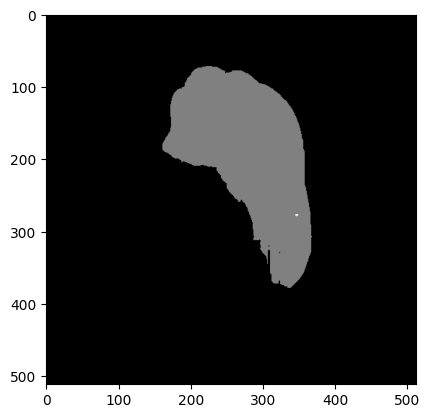

In [30]:
imgSlice=mask[:,:,65]
plt.imshow(imgSlice,cmap='gray')
plt.show()


In [31]:
HOUNSFIELD_MIN=-1000 ####### may be i will have to change these valuse accoriding to values of my images
HOUNSFIELD_MAX=2000
HOUNSFIELD_RANGE=HOUNSFIELD_MAX-HOUNSFIELD_MIN
def normalizeImageIntensityRange(img):
    img[img<HOUNSFIELD_MIN]=HOUNSFIELD_MIN
    img[img>HOUNSFIELD_MAX]=HOUNSFIELD_MAX
    return (img-HOUNSFIELD_MIN)/HOUNSFIELD_RANGE

##this is used to normalze the images

In [32]:
def readImageVolume(imgPath,normalize=False):
    img=nib.load(imgPath).get_fdata()
    if normalize:
        return normalizeImageIntensityRange(img)
    else:
        return img

#this is used to read the images


In [33]:
def saveSlice(img,fname,path):
    img=np.uint8(img*255)
    fout=os.path.join(path,f'{fname}.png')
    cv2.imwrite(fout,img)
    print(f'[+] Slice saved:{fout}',end='\r')

In [34]:
SLICE_DECIMATE_IDENTIFIER=3
SLICE_X=True
SLICE_Y=True
SLICE_Z=True
def sliceAndSaveVolumeImage(vol,fname,path):
    (dimx,dimy,dimz)=vol.shape
    count=0
    if SLICE_X:
        count+=dimx
        print('Slicing X:')
        for i in range(dimx):
            saveSlice(vol[i,:,:],fname+f'-slice{str(i).zfill(SLICE_DECIMATE_IDENTIFIER)}_x',path)

    
    if SLICE_Y:
        count+=dimy
        print('Slicing Y:')
        for i in range(dimy):
            saveSlice(vol[:,i,:],fname+f'-slice{str(i).zfill(SLICE_DECIMATE_IDENTIFIER)}_y',path)
    
    
    if SLICE_Z:
        count+=dimz
        print('Slicing Z:')
        for i in range(dimz):
            saveSlice(vol[:,:,i],fname+f'-slice{str(i).zfill(SLICE_DECIMATE_IDENTIFIER)}_z',path)
    

In [ ]:
for index,filename in enumerate(sorted(glob.iglob(imagePathInput+'*.nii'))):
    print('index of the file being sliced : ',index)
    img=readImageVolume(filename,True)
    print(filename,img.shape,np.sum(img.shape),np.min(img),np.max(img))
    numofSlices=sliceAndSaveVolumeImage(img,'volume-'+str(index),imageSliceOutput)
    print(f'\n{filename},{numofSlices} slices created \n')

In [83]:
for index,filename in enumerate(sorted(glob.iglob(maskPathInput+'*.nii'))):
    print('index of the file being sliced : ',index)
    img=readImageVolume(filename,False)
    print(filename,img.shape,np.sum(img.shape),np.min(img),np.max(img))
    numofSlices=sliceAndSaveVolumeImage(img,'segmentation-'+str(index),maskSliceOutput)
    print(f'\n{filename},{numofSlices} slices created \n')

index of the file being sliced :  0
D:\semester 5\Image Processing and Machine Vision\group project\data\volumes\mask\segmentation-0.nii (512, 512, 75) 1099 0.0 2.0
Slicing X:
Slicing Y:saved:D:\semester 5\Image Processing and Machine Vision\group project\data\slices\mask\segmentation-0-slice511_x.png
Slicing Z:saved:D:\semester 5\Image Processing and Machine Vision\group project\data\slices\mask\segmentation-0-slice511_y.png
[+] Slice saved:D:\semester 5\Image Processing and Machine Vision\group project\data\slices\mask\segmentation-0-slice074_z.png
D:\semester 5\Image Processing and Machine Vision\group project\data\volumes\mask\segmentation-0.nii,None slices created 

index of the file being sliced :  1
D:\semester 5\Image Processing and Machine Vision\group project\data\volumes\mask\segmentation-1.nii (512, 512, 123) 1147 0.0 2.0
Slicing X:
Slicing Y:saved:D:\semester 5\Image Processing and Machine Vision\group project\data\slices\mask\segmentation-1-slice511_x.png
Slicing Z:saved:

In [6]:
import os
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras


In [58]:
# Define constants
SEED = 909
BATCH_SIZE_TRAIN = 10
BATCH_SIZE_TEST = 10

IMAGE_HEIGHT = 200
IMAGE_WIDTH = 200
IMG_SIZE = (IMAGE_HEIGHT, IMAGE_WIDTH)

data_dir = r'D:\semester 5\Image Processing and Machine Vision\group project\sample data'
data_dir_train = os.path.join(data_dir, 'train_data')
# The images should be stored under: "data/slices/training/img/img"
data_dir_train_image = os.path.join(data_dir_train, 'img')
# The images should be stored under: "data/slices/training/mask/img"
data_dir_train_mask = os.path.join(data_dir_train, 'mask')

data_dir_test = os.path.join(data_dir, 'test_data')
# The images should be stored under: "data/slices/test/img/img"
data_dir_test_image = os.path.join(data_dir_test, 'img')
# The images should be stored under: "data/slices/test/mask/img"
data_dir_test_mask = os.path.join(data_dir_test, 'mask')


NUM_OF_EPOCHS = 5

In [59]:
def create_segmentation_generator_train(img_path, msk_path, BATCH_SIZE):
    data_gen_args = dict()
    datagen = ImageDataGenerator(**data_gen_args)
    
    img_generator = datagen.flow_from_directory(img_path, target_size=IMG_SIZE, class_mode=None, color_mode='grayscale', batch_size=BATCH_SIZE, seed=SEED)
    msk_generator = datagen.flow_from_directory(msk_path, target_size=IMG_SIZE, class_mode=None, color_mode='grayscale', batch_size=BATCH_SIZE, seed=SEED)
    return zip(img_generator, msk_generator)

# Remember not to perform any image augmentation in the test generator!
def create_segmentation_generator_test(img_path, msk_path, BATCH_SIZE):
    data_gen_args = dict(rescale=1./255)
    datagen = ImageDataGenerator(**data_gen_args)
    
    img_generator = datagen.flow_from_directory(img_path, target_size=IMG_SIZE, class_mode=None, color_mode='grayscale', batch_size=BATCH_SIZE, seed=SEED)
    msk_generator = datagen.flow_from_directory(msk_path, target_size=IMG_SIZE, class_mode=None, color_mode='grayscale', batch_size=BATCH_SIZE, seed=SEED)
    return zip(img_generator, msk_generator)

In [60]:
train_generator = create_segmentation_generator_train(data_dir_train_image, data_dir_train_mask, BATCH_SIZE_TRAIN)
test_generator = create_segmentation_generator_test(data_dir_test_image, data_dir_test_mask, BATCH_SIZE_TEST)

Found 191683 images belonging to 1 classes.
Found 191683 images belonging to 1 classes.
Found 1099 images belonging to 1 classes.
Found 1099 images belonging to 1 classes.


In [91]:
def display(display_list):
    plt.figure(figsize=(15,15))
    
    title = ['Input Image', 'True Mask', 'Predicted Mask']
    
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]), cmap='gray')
    plt.show()

In [92]:
def show_dataset(datagen, num=1):
    for i in range(0,num):
        image,mask = next(datagen)
        display([image[0], mask[0]])

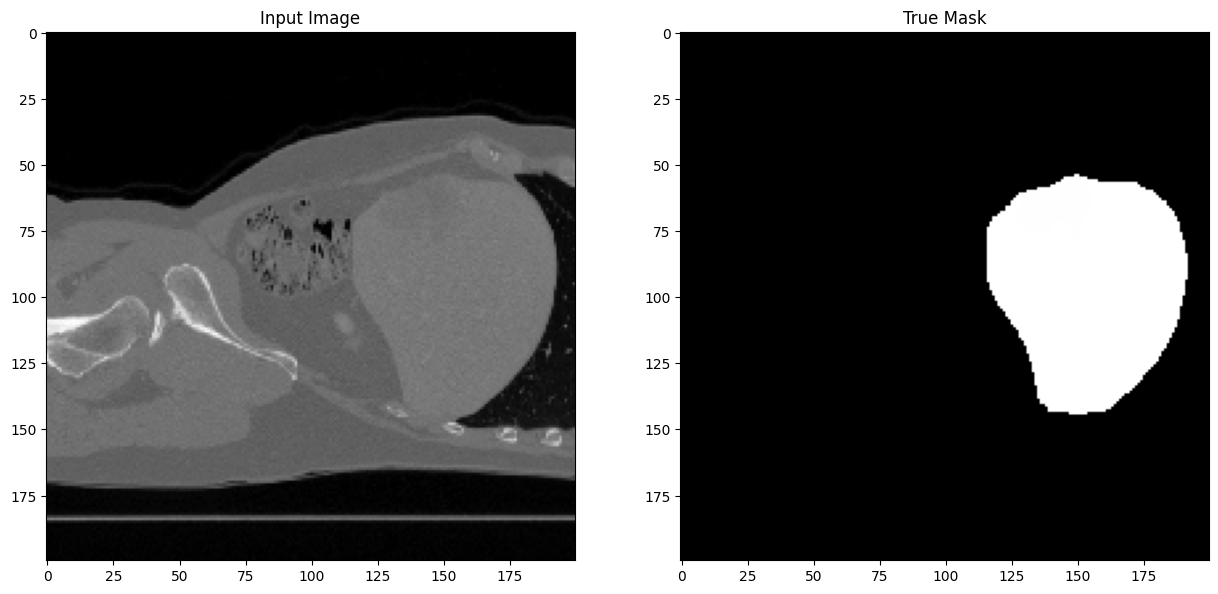

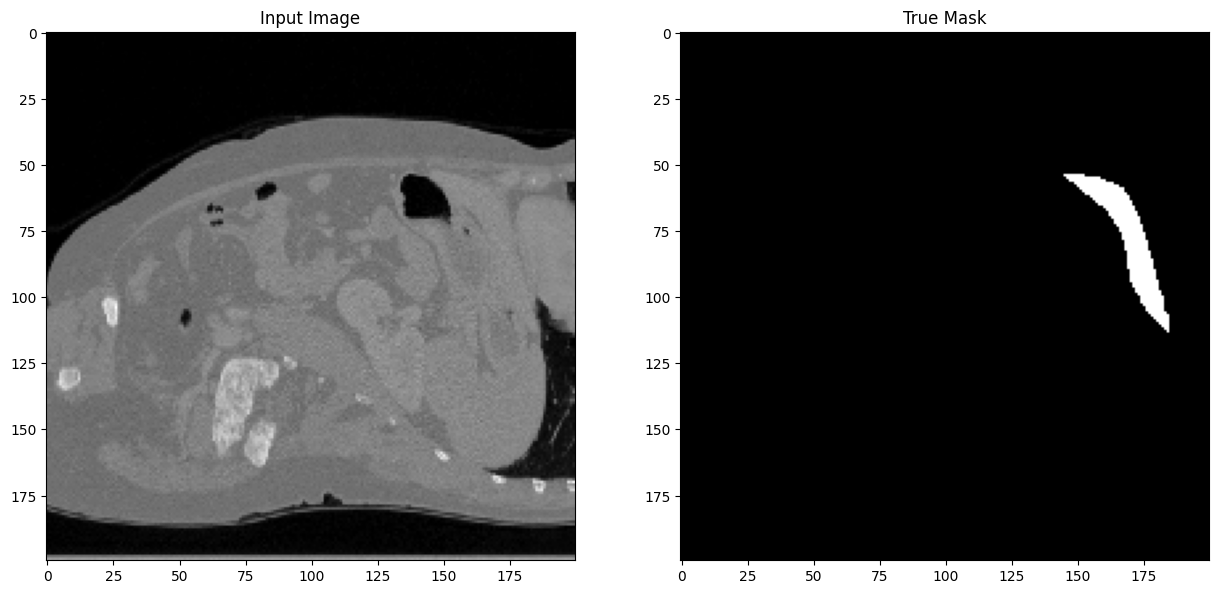

In [93]:
show_dataset(train_generator, 2)

In [107]:
def unet(n_levels, initial_features=32, n_blocks=2, kernel_size=3, pooling_size=2, in_channels=1, out_channels=1):
    inputs = keras.layers.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, in_channels))
    x = inputs
    
    convpars = dict(kernel_size=kernel_size, activation='relu', padding='same')
    
    #downstream
    skips = {}
    for level in range(n_levels):
        for _ in range(n_blocks):
            x = keras.layers.Conv2D(initial_features * 2 ** level, **convpars)(x)
        if level < n_levels - 1:
            skips[level] = x
            x = keras.layers.MaxPool2D(pooling_size)(x)
            
    # upstream
    for level in reversed(range(n_levels-1)):
        x = keras.layers.Conv2DTranspose(initial_features * 2 ** level, strides=pooling_size, **convpars)(x)
        x = keras.layers.Concatenate()([x, skips[level]])
        for _ in range(n_blocks):
            x = keras.layers.Conv2D(initial_features * 2 ** level, **convpars)(x)
            
    # output
    activation = 'sigmoid' if out_channels == 1 else 'softmax'
    x = keras.layers.Conv2D(out_channels, kernel_size=1, activation=activation, padding='same')(x)
    
    return keras.Model(inputs=[inputs], outputs=[x], name=f'UNET-L{n_levels}-F{initial_features}')
        

In [120]:
NUM_TRAIN=100
NUM_TEST=100

NUM_OF_EPOCHS=5


EPOCH_STEP_TRAIN=NUM_TRAIN//BATCH_SIZE_TRAIN
EPOCH_STEP_TEST=NUM_TEST//BATCH_SIZE_TEST

model=unet(4)
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])



In [121]:
model.fit_generator(generator=train_generator, 
                    steps_per_epoch=EPOCH_STEP_TRAIN, 
                    validation_data=test_generator, 
                    validation_steps=EPOCH_STEP_TEST,
                   epochs=NUM_OF_EPOCHS)

Epoch 1/5


C:\Users\msi\AppData\Local\Temp\ipykernel_4680\2617483852.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator=train_generator,


10/10 [==============================] - 45s 4s/step - loss: -166865.4219 - accuracy: 0.1549 - val_loss: 1745.9678 - val_accuracy: 0.0258
Epoch 2/5
10/10 [==============================] - 39s 4s/step - loss: -16049971200.0000 - accuracy: 0.0000e+00 - val_loss: 94977168.0000 - val_accuracy: 0.0255
Epoch 3/5
10/10 [==============================] - 41s 4s/step - loss: -74740433682432.0000 - accuracy: 0.0000e+00 - val_loss: 375585603584.0000 - val_accuracy: 0.0454
Epoch 4/5
10/10 [==============================] - 44s 4s/step - loss: -100617829476204544.0000 - accuracy: 0.0000e+00 - val_loss: 225370406125568.0000 - val_accuracy: 0.0141
Epoch 5/5
10/10 [==============================] - 44s 4s/step - loss: -26089233894101483520.0000 - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.9783


In [110]:
test_generator = create_segmentation_generator_test(data_dir_test_image, data_dir_test_mask, 1)

Found 1099 images belonging to 1 classes.


Found 1099 images belonging to 1 classes.


In [111]:
def display(display_list):
    plt.figure(figsize=(15,15))
    
    title = ['Input Image', 'True Mask', 'Predicted Mask']
    
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]), cmap='gray')
    plt.show()

In [112]:
def show_prediction(datagen, num=1):
    for i in range(0,num):
        image,mask = next(datagen)
        pred_mask = model.predict(image)
        print(pred_mask[0].shape)
        pred_mask=pred_mask[0]
        display([image[0], mask[0], pred_mask])
        

1/1 [==============================] - 0s 130ms/step
(200, 200, 1)


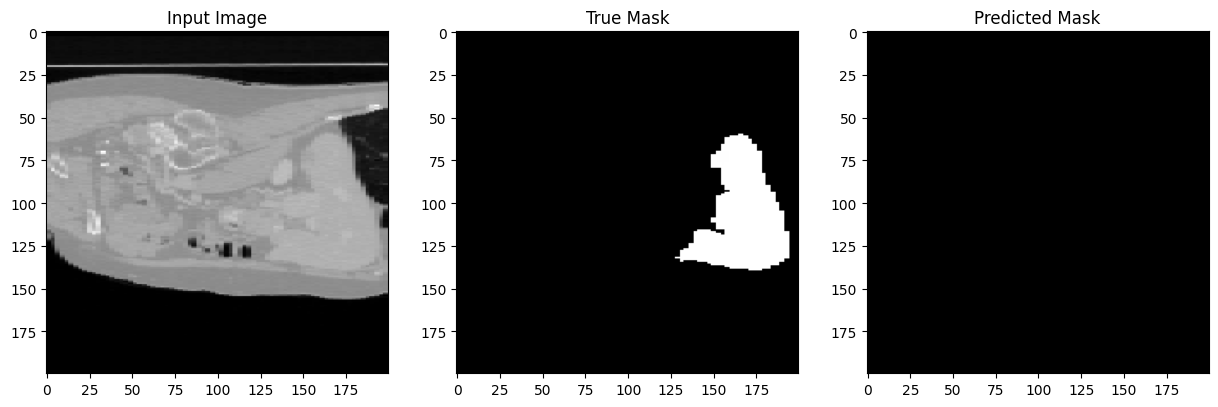

In [126]:
show_prediction(test_generator, 1)